In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ft
import cv2 as cv
import os
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
from keras import Sequential
import warnings as wn
wn.filterwarnings('ignore')

In [5]:
train_dir = '/kaggle/input/vcor-vehicle-color-recognition-dataset/train'
test_dir = '/kaggle/input/vcor-vehicle-color-recognition-dataset/test'
val_dir = '/kaggle/input/vcor-vehicle-color-recognition-dataset/val'

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
def show_random_images(directory, num_images=12):
    image_files = os.listdir(directory)
    random.shuffle(image_files)
    
    plt.figure(figsize=(10, 6))
    for i in range(num_images):
        plt.subplot(3, 4, i+1)
        img = mpimg.imread(os.path.join(directory, image_files[i]))
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

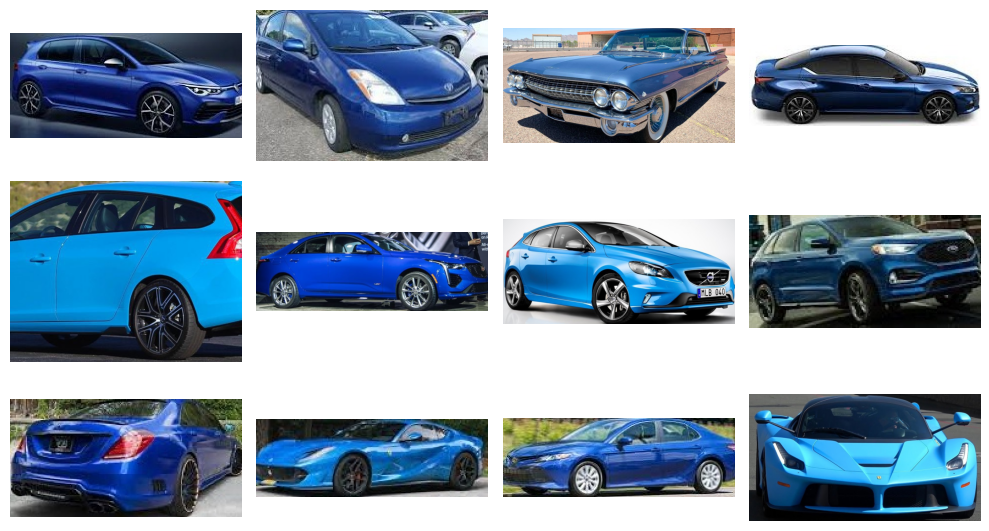

In [14]:
direct = "/kaggle/input/vcor-vehicle-color-recognition-dataset/train/blue"
show_random_images(directory=direct)

In [7]:
l,w = 100,100
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [8]:
train_df = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(l,w),
    batch_size=64,
    class_mode = 'categorical',
    shuffle=True
)

val_df = val_gen.flow_from_directory(
    directory=val_dir,
    target_size=(l,w),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_df = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(l,w),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [9]:
nb_class = 15

In [10]:
train_df.class_indices.keys()
val_df.class_indices.keys()

dict_keys(['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow'])

### CNN 

In [11]:
model = Sequential()

model.add(Conv2D(16,(3,3),strides=1,padding='valid',activation='relu',input_shape=(l,w,3)))
model.add(Conv2D(16,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(32,(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(32,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(64,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(128,(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(128,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=nb_class,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 44, 44, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       345,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         3,015 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702,635 (2.68 MB)

 Trainable params: 702,635 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint("/kaggle/working/best_model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
hist = model.fit(train_df, batch_size=64, epochs=10, validation_data=val_df, callbacks=[checkpoint, early_stopping])


Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 31s 222ms/step - accuracy: 0.7038 - loss: 0.8497 - val_accuracy: 0.7135 - val_loss: 1.0256
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 203ms/step - accuracy: 0.7465 - loss: 0.6955 - val_accuracy: 0.7742 - val_loss: 1.0423
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.7717 - loss: 0.6392 - val_accuracy: 0.7645 - val_loss: 0.9699
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.7852 - loss: 0.5979 - val_accuracy: 0.7574 - val_loss: 0.8525
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 203ms/step - accuracy: 0.7905 - loss: 0.5829 - val_accuracy: 0.7729 - val_loss: 0.7761
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - accuracy: 0.8043 - loss: 0.5265 - val_accuracy: 0.7903 - val_loss: 1.6814
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - accuracy: 0.8174 - loss: 0.5131 - val_accuracy: 0.7703 - val_loss: 1.1843
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - accuracy: 0.7990 - loss: 0

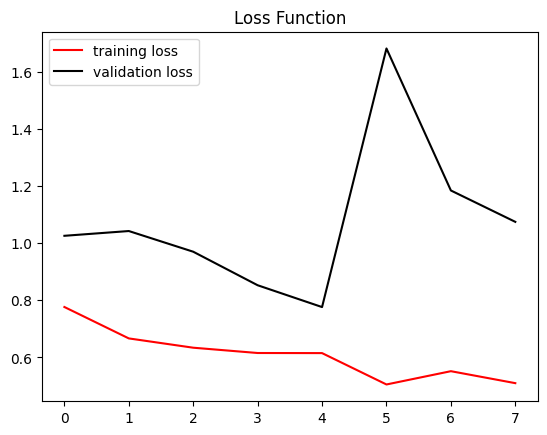

In [18]:
plt.title('Loss Function')
sns.lineplot(hist.history['loss'],label = 'training loss',c='r')
sns.lineplot(hist.history['val_loss'],label = 'validation loss',c='black')
plt.show()

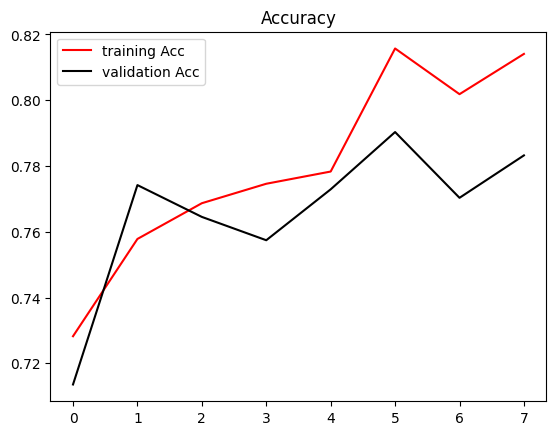

In [20]:
plt.title('Accuracy')
sns.lineplot(hist.history['accuracy'],label = 'training Acc',c='r')
sns.lineplot(hist.history['val_accuracy'],label = 'validation Acc',c='black')
plt.show()

In [21]:
y_pred = model.predict(test_df,batch_size=32)
y_pred = np.argmax(y_pred,axis=1)
mat = confusion_matrix(test_df.classes,y_pred)

2024-03-08 06:27:34.856889: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1515: 5.1395, expected 4.51896
2024-03-08 06:27:34.856954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6170: 4.98849, expected 4.36794
2024-03-08 06:27:34.856974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8598: 5.15731, expected 4.53677
2024-03-08 06:27:34.857030: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19208: 6.18736, expected 5.46829
2024-03-08 06:27:34.857044: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19237: 6.04134, expected 5.32226
2024-03-08 06:27:34.857058: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19289: 5.95153, expected 5.23246
2024-03-08 06:27:34.857070: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19342: 5.95117, expected 5.23209
2024-03-08 06:27:34.857080: E e

48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

2024-03-08 06:27:45.321138: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9604: 6.46542, expected 5.66351
2024-03-08 06:27:45.321192: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9615: 6.29523, expected 5.49332
2024-03-08 06:27:45.321202: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9633: 6.10678, expected 5.30487
2024-03-08 06:27:45.321211: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9634: 6.7822, expected 5.98029
2024-03-08 06:27:45.321219: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9635: 6.60684, expected 5.80493
2024-03-08 06:27:45.321227: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9649: 6.77183, expected 5.96992
2024-03-08 06:27:45.321236: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9660: 6.89226, expected 6.09035
2024-03-08 06:27:45.321244: E exter

49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step


<Axes: >

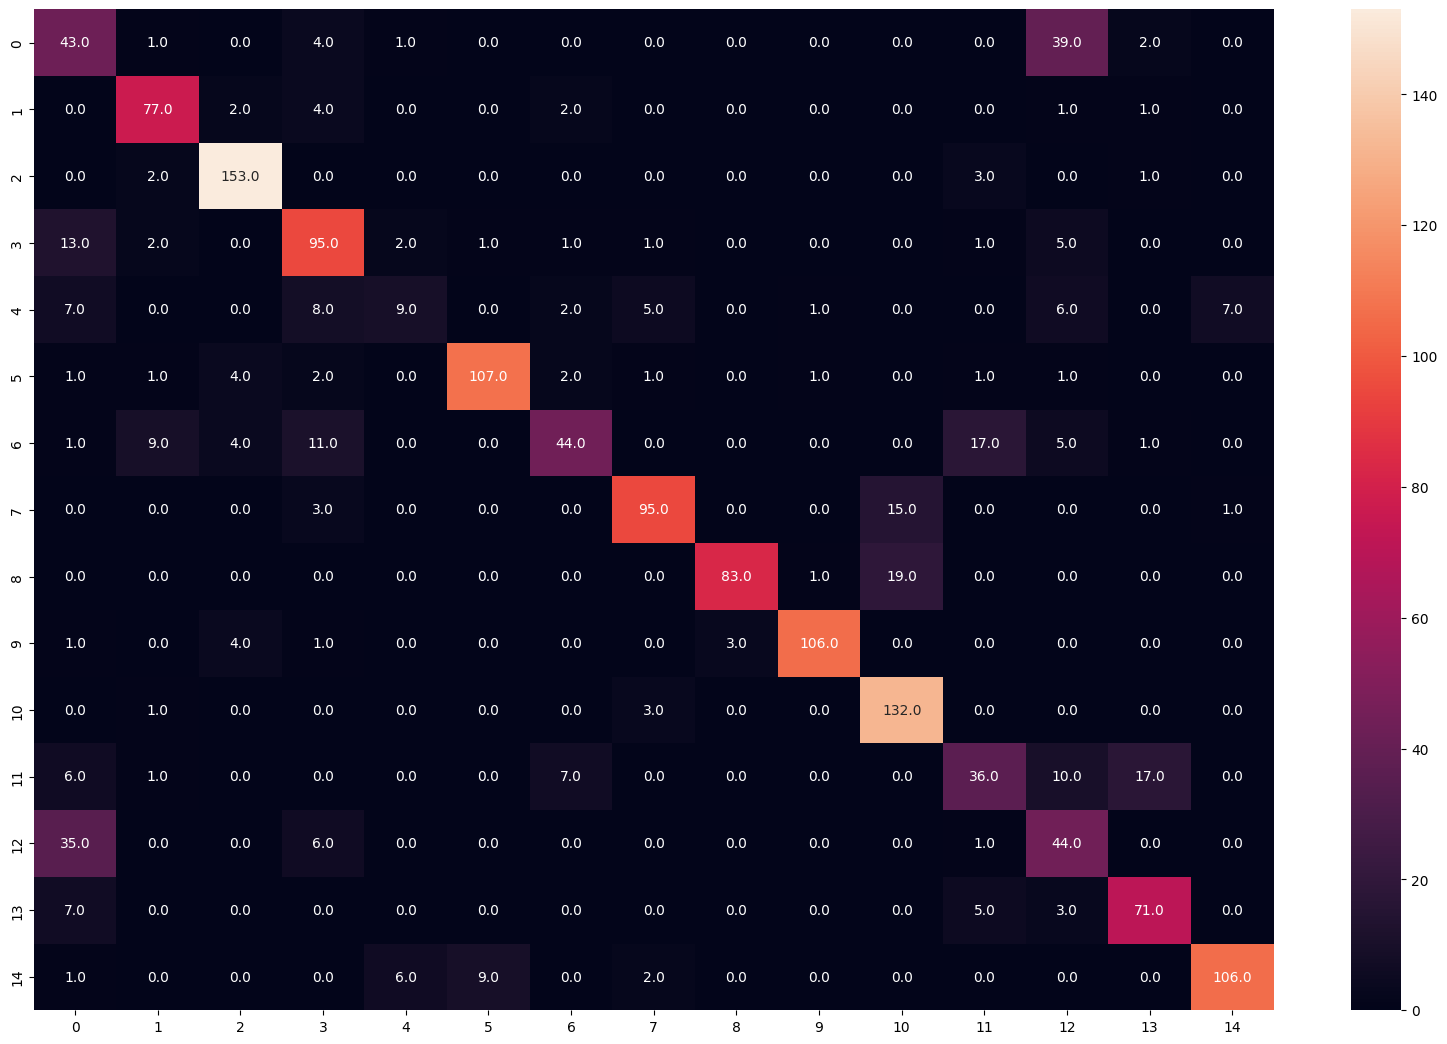

In [22]:
plt.figure(figsize=(20,13))
sns.heatmap(mat,annot=True,fmt='.1f')

In [23]:
report = classification_report(test_df.classes, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.37      0.48      0.42        90
           1       0.82      0.89      0.85        87
           2       0.92      0.96      0.94       159
           3       0.71      0.79      0.75       121
           4       0.50      0.20      0.29        45
           5       0.91      0.88      0.90       121
           6       0.76      0.48      0.59        92
           7       0.89      0.83      0.86       114
           8       0.97      0.81      0.88       103
           9       0.97      0.92      0.95       115
          10       0.80      0.97      0.87       136
          11       0.56      0.47      0.51        77
          12       0.39      0.51      0.44        86
          13       0.76      0.83      0.79        86
          14       0.93      0.85      0.89       124

    accuracy                           0.77      1556
   macro avg       0.75      0.72      0.73      1556
weighted avg       0.78   

In [15]:
import cv2
import numpy as np
import tensorflow as tf

# Load your pretrained CNN model
model = model

# Load and preprocess the image
image = cv2.imread('/kaggle/input/vcor-vehicle-color-recognition-dataset/test/beige/02e37c0e56.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(image, (80,80))
input_image = input_image / 255.0  # Normalize

# Make predictions
predictions = model.predict(np.expand_dims(input_image, axis=0))

NameError: name 'model' is not defined

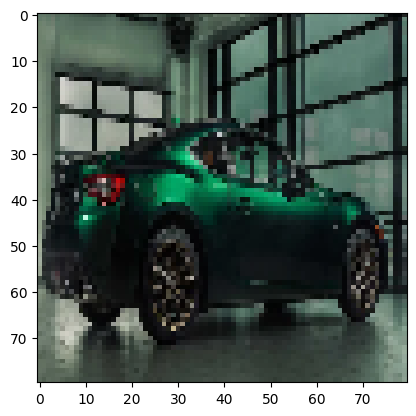

In [165]:
plt.imshow(input_image)

In [166]:
predictions = np.argmax(predictions,axis=1)
predictions = predictions[0]

In [167]:
label = list(test_df.class_indices.keys())

In [168]:
print('The Color of the car is ',label[predictions])

The Color of the car is  green


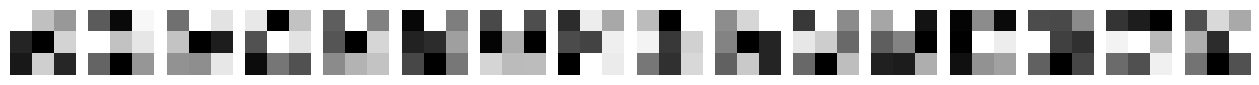

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your trained CNN model
# Extract the filters from the first convolutional layer
first_conv_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        first_conv_layer = layer
        break

if first_conv_layer is None:
    raise ValueError("No convolutional layer found in the model.")

filters, _ = first_conv_layer.get_weights()

# Prepare a figure to display the first layer filters
num_filters = filters.shape[3]
plt.figure(figsize=(num_filters, 1))

# Display each filter
for i in range(num_filters):
    plt.subplot(1, num_filters, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')  # Display the first channel of the filter
    plt.axis('off')

plt.show()

In [162]:
filt = filters[:,:,0,14]
img = cv2.filter2D(image,-1,filt)

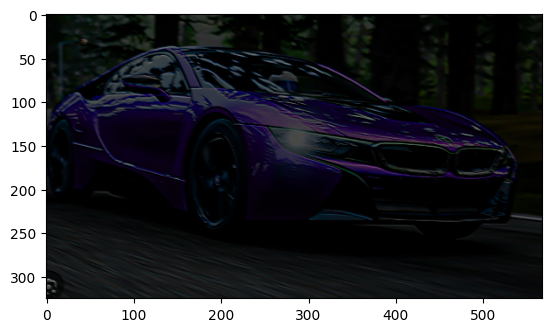

In [163]:
plt.imshow(img)